<a href="https://colab.research.google.com/github/sametgumus212/Python/blob/master/Generative_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


!pip install tensorflow
!pip install keras
!pip install bunch

--2020-09-25 17:49:13--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   120MB/s    in 0.7s    

2020-09-25 17:49:14 (120 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-p

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [78]:
import sys
sys.path.insert(0,'/content/drive/My Drive/DD')

In [ ]:
# Load ZINC data

moses_smiles = pd.read_csv('/content/drive/My Drive/DD/datasets/moses_dataset_v1.txt',sep=',')
print(moses_smiles.shape)
moses_smiles = moses_smiles[moses_smiles['SMILES'].notnull()]
print(moses_smiles.shape)
moses_smiles['smiles'] = moses_smiles["SMILES"]
moses_smiles['length'] = moses_smiles["smiles"].str.len()
moses_smiles.head()

(1936962, 2)
(1936962, 2)


,SMILES,SPLIT,smiles,length
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1,train,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1,38
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,train,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,36
2,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,test,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,38
3,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,train,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,35
4,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,train,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,32


In [ ]:

# Load ChEMBL data

chembl_smiles = pd.read_csv('/content/drive/My Drive/DD/datasets/chembl_dataset.txt', names=["smiles"])
chembl_smiles['length'] = chembl_smiles["smiles"].str.len() 
print(chembl_smiles.shape)
chembl_smiles.head()

(556134, 2)


,smiles,length
0,C1CCCCCNc2cc[n+](Cc3cccc(c3)c4cccc(C[n+]5ccc(N...,74
1,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,35
2,I\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,34
3,O=C1O\C(=C\C#C)\CCC1c2cccc3ccccc23,34
4,I\C=C/1\CCC(C(=O)O1)c2cccc3ccccc23,34


In [ ]:
# Drop duplicates and append both dataset

moses_smiles = moses_smiles['smiles']
print(moses_smiles.shape)
moses_smiles = moses_smiles.drop_duplicates()
print(moses_smiles.shape)

(1936962,)
(1936962,)


In [ ]:
chembl_smiles = chembl_smiles['smiles']
print(chembl_smiles.shape)
chembl_smiles = chembl_smiles.drop_duplicates()
print(chembl_smiles.shape)

(556134,)
(556134,)


In [ ]:
smiles = moses_smiles.append(chembl_smiles)
print(smiles.shape)
smiles = smiles.drop_duplicates()
print(smiles.shape)

(2493096,)
(2492860,)


In [ ]:
# Total SMILES ~2.5 million
# Included this step to randomly sample 250000 smiles for model testing (run it in cloud GPU later for whole dataset)
smiles = smiles.sample(250000)

In [ ]:
smiles.to_csv(r'/content/drive/My Drive/DD/datasets/all_smiles2.txt', header=None, index=None, sep='\t', mode='a')

In [ ]:
all_smiles_test = pd.read_csv('/content/drive/My Drive/DD/datasets/all_smiles2.txt',sep='\t', header=None)
print(all_smiles_test.shape)
all_smiles_test.head()


(250000, 1)


,0
0,O=S(=O)(Nc1ccnn1CC1CC1)c1ccc(C(F)(F)F)nc1
1,Cc1n[nH]cc1CNC(=O)Cn1cnc2sccc2c1=O
2,COc1ccc2nc(C(=O)N3CCOCC3)cn2n1
3,CCNC(=O)C1CCCN(C(C#N)c2c(F)cccc2Cl)C1
4,CC(CCCO)NC(=O)NC(c1ccccc1)C1CCC1


Remdesivir- CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=CC=C3N2N=CN=C3N)O)O)OC4=CC=CC=C4

Nelfinavir- CC1=C(C=CC=C1O)C(=O)NC(CSC2=CC=CC=C2)C(CN3CC4CCCCC4CC3C(=O)NC(C)(C)C)O

Lopinavir- CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(CC3=CC=CC=C3)NC(=O)C(C(C)C)N4CCCNC4=O)O

Ritonavir- CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2=CC=CC=C2)CC(C(CC3=CC=CC=C3)NC(=O)OCC4=CN=CS4)O

Other protease inhibitors as potential treatments

Darunavir- CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2COC3C2CCO3)O)S(=O)(=O)C4=CC=C(C=C4)N

Atazanavir- CC(C)(C)C(C(=O)NC(CC1=CC=CC=C1)C(CN(CC2=CC=C(C=C2)C3=CC=CC=N3)NC(=O)C(C(C)(C)C)NC(=O)OC)O)NC(=O)OC

In [ ]:

protease_smiles_test = pd.read_csv('/content/drive/My Drive/DD/datasets/protease_inhibitors_for_fine-tune.txt',sep='\t', header=None)
print(protease_smiles_test.shape)
protease_smiles_test

(6, 1)


,0
0,CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=...
1,CC1=C(C=CC=C1O)C(=O)NC(CSC2=CC=CC=C2)C(CN3CC4C...
2,CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(C...
3,CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2...
4,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2COC3C2CCO3)...
5,CC(C)(C)C(C(=O)NC(CC1=CC=CC=C1)C(CN(CC2=CC=C(C...


pre-processing

In [ ]:

all_smiles_clean = pd.read_csv('/content/drive/My Drive/DD/datasets/all_smiles_clean.txt',sep='\t', header=None)
print(all_smiles_clean.shape)
all_smiles_clean.head()

(180793, 1)


,0
0,NC(=O)c1cnn2cc(-c3cccnc3)cc2c1NC1CCOCC1
1,COC(=O)C(NC1CCc2c(F)cccc21)c1cccc(C#N)c1
2,CC1CCCC(CNC(=O)CNC(=O)c2ccc(F)c(F)c2)C1
3,CC1CN(CC2CCN(C(=O)C(C)(C)C)CC2)CC(C)O1
4,NC(=O)C1Cc2ccccc2N1C(=O)c1ccc2ccccc2n1


In [ ]:
all_smiles_clean.to_csv(r'all_smiles_clean.txt', header=None, index=None, sep='\t', mode='a')

LSTM


In [ ]:
!conda install -c conda-forge rdkit

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.5-py37_0 --> conda-forge::conda-4.8.5-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi               pkgs/main::certifi-2020.6.20-py37_0 --> conda-forge::certifi-2020.6.20-py37hc8dfbb8_0
  openssl              pkgs/main::openssl-1.1.1h-h7b6447c_0 --> conda-forge::openssl-1.1.1h-h516909a_0


Proceed ([y]/n)? y

Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


In [ ]:
! conda install -c conda-forge bunch

Solving environment: | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bunch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bunch-1.0.1                |             py_1           8 KB  conda-forge
    ------------------------------------------------------------
                                           Total:           8 KB

The following NEW packages will be INSTALLED:

  bunch              conda-forge/noarch::bunch-1.0.1-py_1


Proceed ([y]/n)? y


bunch-1.0.1          | 8 KB      | : 100% 1.0/1 [00:00<00:00,  5.34it/s]
Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ | / - \ | done


In [ ]:
!conda install -c anaconda scikit-learn

Solving environment: / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    conda-4.8.5                |           py37_0         3.1 MB  anaconda
    joblib-0.16.0              |             py_0         210 KB  anaconda
    libgfortran-ng-7.3.0       |       hdf63c60_0         1.3 MB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    scikit-learn-0.23.2        |   py37h0573a6f_0         6.9 MB  anaconda
    scipy-1.5.2                |   py37h0b6359f_0        14.3 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          16 KB  anaconda
    --

In [ ]:
from copy import copy

from lstm_chem.utils.config import process_config
from lstm_chem.utils.dirs import create_dirs
from lstm_chem.data_loader import DataLoader
from lstm_chem.model import LSTMChem
from lstm_chem.trainer import LSTMChemTrainer

CONFIG_FILE = '/content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/config.json'


def main():
    config = process_config(CONFIG_FILE)

    # create the experiments dirs
    create_dirs(
        [config.exp_dir, config.tensorboard_log_dir, config.checkpoint_dir])

    print('Create the data generator.')
    train_dl = DataLoader(config, data_type='train')
    valid_dl = copy(train_dl)
    valid_dl.data_type = 'valid'

    print('Create the model.')
    modeler = LSTMChem(config, session='train')

    print('Create the trainer')
    trainer = LSTMChemTrainer(modeler, train_dl, valid_dl)

    print('Start training the model.')
    trainer.train()

 
if __name__ == '__main__':
    main()

Create the data generator.
loading SMILES...


  0%|          | 345/180793 [00:00<00:52, 3447.76it/s]

done.
tokenizing SMILES...


  9%|▉         | 16763/180793 [00:04<00:47, 3443.87it/s]

KeyboardInterrupt: ignored

Generate new Molecules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from lstm_chem.utils.config import process_config
from lstm_chem.model import LSTMChem
from lstm_chem.generator import LSTMChemGenerator

In [ ]:
CONFIG_FILE = '/content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/config.json'
config = process_config(CONFIG_FILE)

In [ ]:

modeler = LSTMChem(config, session='generate')
generator = LSTMChemGenerator(modeler)
print(config)

Loading model architecture from /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/model_arch.json ...
Loading model checkpoint from /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/checkpoints/LSTM_Chem-baseline-model-full.hdf5 ...
Loaded the Model.
batch_size: 512
checkpoint_dir: experiments/2020-09-25/LSTM_Chem/checkpoints/
checkpoint_mode: min
checkpoint_monitor: val_loss
checkpoint_save_best_only: false
checkpoint_save_weights_only: true
checkpoint_verbose: 1
config_file: /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/config.json
data_filename: /content/drive/My Drive/DD/datasets/all_smiles_clean.txt
data_length: 0
exp_dir: experiments/2020-09-25/LSTM_Chem
exp_name: LSTM_Chem
finetune_batch_size: 1
finetune_data_filename: /content/drive/My Drive/DD/datasets/protease_inhibitors_for_fine-tune.txt
finetune_epochs: 12
model_arch_filename: /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/model_arch.json
model_weight_filena

In [ ]:

sample_number = 100
sampled_smiles = generator.sample(num=sample_number)


100%|██████████| 100/100 [03:14<00:00,  1.95s/it]


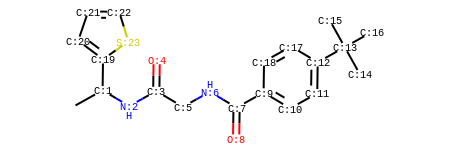

In [62]:
from rdkit.Chem.Draw import IPythonConsole
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol_with_atom_index(mol)



In [ ]:

for atom in sampled_smiles:
  
   atom.SetAtomMapNum(atom.GetIdx())
  

In [71]:
from rdkit import RDLogger, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Draw import IPythonConsole
RDLogger.DisableLog('rdApp.*')

In [ ]:

valid_mols = []
for smi in sampled_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        valid_mols.append(mol)
# High validity
print('Validity: ', f'{len(valid_mols) / sample_number:.2%}')

valid_smiles = [Chem.MolToSmiles(mol) for mol in valid_mols]
# high uniqueness
print('Uniqueness: ', f'{len(set(valid_smiles)) / len(valid_smiles):.2%}')

# Of valid smiles generated, how many are truly original vs ocurring in the training data
import pandas as pd
training_data = pd.read_csv('/content/drive/My Drive/DD/datasets/all_smiles_clean.txt', header=None)
training_set = set(list(training_data[0]))
original = []
for smile in valid_smiles:
    if not smile in training_set:
        original.append(smile)
print('Originality: ', f'{len(set(original)) / len(set(valid_smiles)):.2%}')

Validity:  95.00%
Uniqueness:  100.00%
Originality:  97.89%


In [79]:
!ls


drive	     Miniconda3-py37_4.8.2-Linux-x86_64.sh    sample_data
experiments  Miniconda3-py37_4.8.2-Linux-x86_64.sh.1


In [82]:

with open('datasets/all_smiles_clean.txt') as f:
    org_smiles = [l.rstrip() for l in f]

org_mols = [mol for mol in [Chem.MolFromSmiles(smi) for smi in org_smiles] if mol is not None]

In [83]:
Vfps = []
for mol in valid_mols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Vfps.append(fp)

Ofps = []
for mol in org_mols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Ofps.append(fp)

In [85]:
from sklearn.decomposition import PCA
Vlen = len(Vfps)
x = Vfps + Ofps
pca = PCA(n_components=2, random_state=7)
X = pca.fit_transform(x)

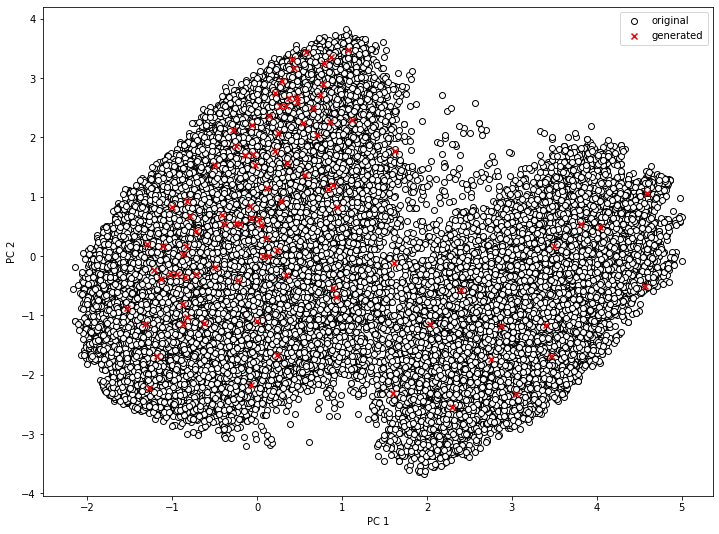

In [86]:
plt.figure(figsize=(12, 9))
plt.scatter(X[Vlen:, 0], X[Vlen:, 1], c='w', edgecolors='k', label='original')
plt.scatter(X[:Vlen, 0], X[:Vlen, 1], marker='x',c='r', label='generated')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend();

In [87]:
props = {
    'MW': {
        'generated': [Descriptors.ExactMolWt(mol) for mol in valid_mols],
        'original': [Descriptors.ExactMolWt(mol) for mol in org_mols]        
    }
}

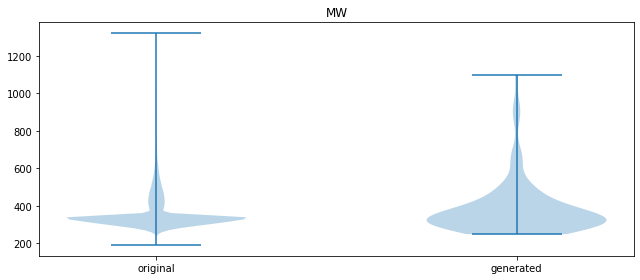

In [88]:
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(1, 1, 1)
ax1.violinplot([props['MW']['original'], props['MW']['generated']])
ax1.set_xticks(ticks=[1, 2])
ax1.set_xticklabels(labels=['original', 'generated'])
ax1.set_title('MW')


plt.tight_layout()

In [89]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

from lstm_chem.utils.config import process_config
from lstm_chem.model import LSTMChem
from lstm_chem.finetuner import LSTMChemFinetuner
from lstm_chem.data_loader import DataLoader

In [90]:
config = process_config('/content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/config.json')

modeler = LSTMChem(config, session='finetune')
finetune_dl = DataLoader(config, data_type='finetune')

finetuner = LSTMChemFinetuner(modeler, finetune_dl)
finetuner.finetune()

Loading model architecture from /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/model_arch.json ...
Loading model checkpoint from /content/drive/My Drive/DD/experiments/base_experiment/LSTM_Chem/checkpoints/LSTM_Chem-baseline-model-full.hdf5 ...
Loaded the Model.
loading SMILES...



100%|██████████| 6/6 [00:00<00:00, 1015.49it/s]

done.
tokenizing SMILES...
done.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12


6/6 [==============================] - 5s 752ms/step - loss: 1.6561
Epoch 2/12
6/6 [==============================] - 5s 840ms/step - loss: 1.2351
Epoch 3/12
6/6 [==============================] - 5s 821ms/step - loss: 0.9948
Epoch 4/12
6/6 [==============================] - 5s 815ms/step - loss: 0.8396
Epoch 5/12
6/6 [==============================] - 5s 848ms/step - loss: 0.8168
Epoch 6/12
6/6 [==============================] - 5s 829ms/step - loss: 0.7002
Epoch 7/12
6/6 [==============================] - 5s 752ms/step - loss: 0.5954
Epoch 8/12
6/6 [==============================] - 5s 872ms/step - loss: 0.5244
Epoch 9/12
6/6 [==============================] - 5s 837ms/step - loss: 0.4659
Epoch 10/12
6/6 [==============================] - 5s 804ms/step - loss: 0.4276
Epoch 11/12
6/6 [==============================] - 5s 795ms/step - loss: 0.4064
Epoch 12/12
6/6 [==============================] - 5s 819ms/step - loss: 0.4039


In [91]:

# Generate 100 fine-tuned molecules
finetuned_smiles = finetuner.sample(num=20)

In [92]:
finetuned_smiles

['CC(C)CN(CO)CC(C(=O)C(NS(C)(=O)=O)C(C)C)C(Cc1ccccc1)NC(=O)NC(C)(C)C',
 'CC(C)CN(CC1OC(=O)C2OCC(OC(=O)NC1Cc1ccccc1)C2O)S(=O)(=O)c1ccccc1',
 'CC(C)CNC(=O)C(NC(Cc1ccccc1)C(CN(CC(C)C)C(=O)NC(C)C)C(=O)NC(C)C)C(=O)O',
 'COC(=O)NC(Cc1ccccc1)C(O)C(=O)NCC(CC(C)C)C(C)(C)C',
 'CC(C)CN(C)CC(C(Cc1ccccc1)NC(=O)OC1COC2C(O)OC12)S(=O)(=O)c1ccccc1',
 'CC(C)CN1CC=CN(C)S(=O)(=O)C(C(O)Cc2cccc(NC(=O)OC3COC4OCCC34)c2)C1',
 'COC(=O)NC(C(=O)NC(Cc1ccccc1)C(CC(=O)NC(C)O)CN(Cc1ccccc1)c1ccccc1)C(C)(C)C',
 'Cc1cccc(C)c1OC(=O)C(NC(=O)OC1COC2C(O)OC12)C(C)C',
 'CC(C)CN(C)CC(C(Cc1ccccc1)NC(=O)OC1COC2OCOC12)S(=O)(=O)c1ccccc1',
 'COC(=O)NC(Cc1ccccc1)C(=O)NC(C(=O)N(C)C(C(=O)NC(C)(C)C)C(C)C)C(C)C',
 'CC(C)CN(CC(NC(=O)OC1CCN2CC(NC2=O)O1)C(Cc1ccccc1)NC(=O)OC1COC2C(=O)CCC12)C(O)CN(C)C',
 'Cc1c(O)cccc1C(=O)NC(Cc1ccccc1)C(O)CN1CC2CCCCC2CC1C(=O)NC(C)(C)C',
 'Cc1cccc(C)c1OCC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(O)CN1CC2CCCCC2C(C(C)C)CN1Cc1ccccc1',
 'CCC(C(=O)NC(C)C(=O)NC(C)C(=O)NC(C)C)C(CC)C(=O)NC(Cc1ccccc1)C(C)C(=O)NC(C)C',
 'CC

In [93]:
# Save fine-tuned smiles
with open('/content/drive/My Drive/DD/generations/finetuned_smiless22.txt', 'w') as f:
    for item in finetuned_smiles:
        f.write("%s\n" % item)

Tanimoto similarity

In [94]:

# Selected training molecules

with open('/content/drive/My Drive/DD/datasets/protease_inhibitors_for_fine-tune.txt') as f:
    fsmiles = [l.rstrip() for l in f]
fmols = [Chem.MolFromSmiles(smi) for smi in fsmiles]

Fbvs = []
for mol in fmols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Fbvs.append(bv)

In [95]:
# Fine-tuned SMILES

Sbvs, smols = [], []
for smi in finetuned_smiles:
    mol = Chem.MolFromSmiles(smi)
    smols.append(mol)
    
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Sbvs.append(bv)

In [96]:
idxs = []
for Fbv in Fbvs:
    idx = np.argmax(DataStructs.BulkTanimotoSimilarity(Fbv, Sbvs))
    idxs.append(idx)
nsmols = [smols[idx] for idx in idxs]

In [97]:
idxs

[16, 11, 12, 10, 19, 6]

In [98]:

generated_finetuned_smiles = [finetuned_smiles[i] for i in idxs]
generated_finetuned_smiles

['CC(C)CN(O)CC1C(=O)OC2OC3OC4(COC4C2OC3=O)C23CC4CC4OC2OCC3OC(=O)NC1Cc1ccccc1',
 'Cc1c(O)cccc1C(=O)NC(Cc1ccccc1)C(O)CN1CC2CCCCC2CC1C(=O)NC(C)(C)C',
 'Cc1cccc(C)c1OCC(=O)NC(Cc1ccccc1)C(=O)NC(Cc1ccccc1)C(O)CN1CC2CCCCC2C(C(C)C)CN1Cc1ccccc1',
 'CC(C)CN(CC(NC(=O)OC1CCN2CC(NC2=O)O1)C(Cc1ccccc1)NC(=O)OC1COC2C(=O)CCC12)C(O)CN(C)C',
 'CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OC1COC2OCCC12)S(=O)(=O)c1ccccc1',
 'COC(=O)NC(C(=O)NC(Cc1ccccc1)C(CC(=O)NC(C)O)CN(Cc1ccccc1)c1ccccc1)C(C)(C)C']

In [99]:
# save generated SMILES

with open('/content/drive/My Drive/DD/generations2/gen0_smiles22.txt', 'w') as f:
    for item in generated_finetuned_smiles:
        f.write("%s\n" % item)

In [100]:

showmols = []
for i, j in zip(fmols, nsmols):
    showmols.append(i)
    showmols.append(j)

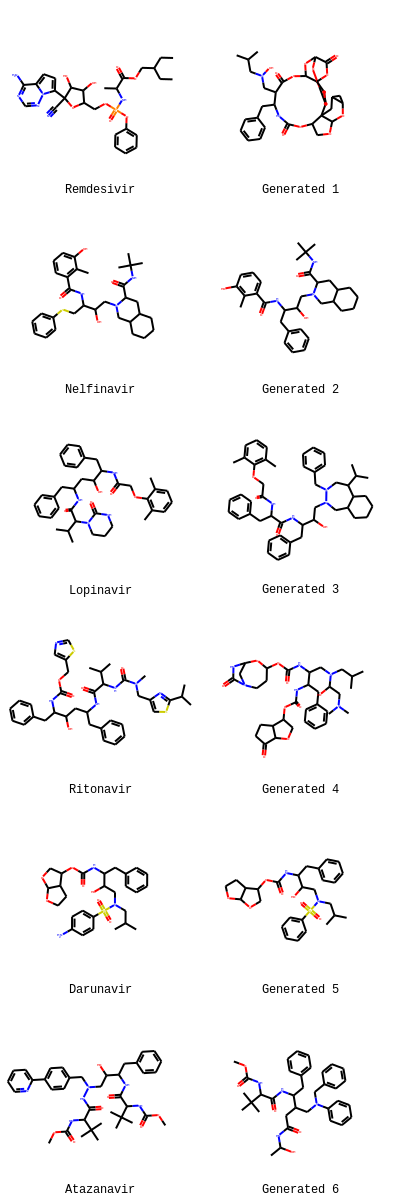

In [101]:
labelList = ['Remdesivir', 'Generated 1',
             'Nelfinavir','Generated 2', 
             'Lopinavir','Generated 3',
             'Ritonavir','Generated 4',
             'Darunavir','Generated 5',
             'Atazanavir', 'Generated 6']

# Display molecules with labels
Draw.MolsToGridImage(showmols, molsPerRow=2, legends=[label for label in labelList])

Docking  PyRx Analysis

In [102]:

import pandas as pd
from rdkit import Chem, DataStructs
import random
import numpy as np
import rdkit.Chem.PropertyMol

In [103]:
gen0_table = pd.read_csv('/content/drive/My Drive/DD/generations2/gen0_smiles22.txt',sep=',', header=None)
gen0 = list(gen0_table[0])
len(gen0)

6

In [104]:

def validate_mols(list_of_smiles):
    valid_mols = []
    for smi in list_of_smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            valid_mols.append(mol)
    return valid_mols

def convert_mols_to_smiles(list_of_mols):
    valid_smiles = [Chem.MolToSmiles(mol) for mol in list_of_mols]
    return valid_smiles

In [105]:
gen0_mols = validate_mols(gen0)
len(gen0_mols)

6

here

In [106]:

master_table = pd.read_csv('/content/drive/My Drive/DD/generations/master_results_table.csv',sep=',')
master_table

,id,gen,smile,source,score
0,AAAA,0,CC(C)CN(CC1ON=CC(C)(Cc2ccccc2)C(=O)NC1Cc1ccccc...,NaN,NaN
1,AAAB,0,CC(C)(C)NC(=O)C1CC2CCCCC2CN1CC(O)C(Cc1ccccc1)N...,NaN,NaN
2,AAAC,0,Cc1cccc(C)c1OCC(=O)NC(CCc1ccc(O)nc1)NCC(=O)NC(...,NaN,NaN
3,AAAD,0,CC(C)c1nc(C(C#N)CC(=O)NC(CCc2ccccc2)C(O)CC(CN(...,NaN,NaN
4,AAAE,0,CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OC1COC2OCCC12)S...,NaN,NaN
5,AAAF,0,COC(=O)NC(CN1CCCCC1C(=O)NC(C(=O)OCc1ccccc1)C(C...,NaN,NaN
6,AAAG,0,CCC(CC)COC(=O)C(C)NP(=O)(OCC1OC(C#N)(c2ccc3c(N...,NaN,NaN
7,AAAH,0,Cc1c(O)cccc1C(=O)NC(CSc1ccccc1)C(O)CN1CC2CCCCC...,NaN,NaN
8,AAAI,0,Cc1cccc(C)c1OCC(=O)NC(Cc1ccccc1)C(O)CC(Cc1cccc...,NaN,NaN
9,AAAJ,0,CC(C)c1nc(CN(C)C(=O)NC(C(=O)NC(Cc2ccccc2)CC(O)...,NaN,NaN


In [107]:
'''Certainly not opimized and not strictly necessary, but in the PyRx GUI
molecule names would sort oddly when in any numeric order, so ordering
molcules by a four letter code. This function iterates the four letter code.'''
def iterate_alpha(alpha_code):
    numbers = []
    for letter in alpha_code:
        number = ord(letter)
        numbers.append(number)
    
    if numbers[3]+1 > 90:
        if numbers[2]+1 > 90:
            if numbers[1]+1 > 90:
                if numbers[0]+1 > 90:
                    raise ValueError('Too long for alpha code')
                else:
                    numbers[3] = 65
                    numbers[2] = 65
                    numbers[1] = 65
                    numbers[0] = numbers[0] + 1
            else:
                numbers[3] = 65
                numbers[2] = 65
                numbers[1] = numbers[1] + 1
        else:
            numbers[3] = 65
            numbers[2] = numbers[2] + 1
    else:
        numbers[3] = numbers[3] + 1
    

    new_code = ""
    for number in numbers:
        new_code += chr(number)
    return new_code
iterate_alpha('AAAA')

'AAAB'

In [108]:
def append_to_tracking_table(master_table,mols_to_append, source, generation):
    # Assign IDs for tracking to each mol, and assign a pandas table entry for each
    mols_to_export = []
    rows_list = []
    
    master_table_gen = master_table[master_table['gen'] == generation]
    if master_table_gen.shape[0] == 0:
        id_code = 'AAAA'
    else:
        master_table_gen_ids = master_table_gen.sort_values('id', ascending=True)
        master_table_gen_max_id = master_table_gen_ids.tail(1)
        key = master_table_gen_max_id['id'].keys()[0]
        id_code = iterate_alpha(str(master_table_gen_max_id['id'][key]))
        
    
    for mol in mols_to_append:
        pm = Chem.PropertyMol.PropertyMol(mol)
        title = 'id' + str(id_code) + 'gen'+ str(generation)
        print(title)
        # Enables for tracking which molecule is which in PyRx GUI and PyRx results export
        pm.SetProp('Title', title)
        mols_to_export.append(pm)

        #And track in pandas
        mol_dict = {}
        mol_dict['id'] = id_code
        mol_dict['gen'] = generation
        smile = Chem.MolToSmiles(mol)
        assert type(smile) == type('string')
        mol_dict['smile'] = smile

        rows_list.append(mol_dict)
        id_code = iterate_alpha(id_code)
        
    df = pd.DataFrame(rows_list)
    return df, mols_to_export

In [109]:
new_mols_to_test = append_to_tracking_table(master_table,gen0_mols, 'generated', 0)
mols_for_pd = new_mols_to_test[0]
mols_for_export = new_mols_to_test[1]
master_table = master_table.append(mols_for_pd)
len(mols_for_export)

idAAAMgen0
idAAANgen0
idAAAOgen0
idAAAPgen0
idAAAQgen0
idAAARgen0


6

In [112]:
master_table = master_table.reset_index(drop=True)
master_table.to_csv(r'/content/drive/My Drive/DD/generations/mrt2.csv', index=False)

In [113]:
# Add protease inhibitors into the table
hiv_smiles = pd.read_csv('./datasets/protease_inhibitors_for_fine-tune.txt',sep=',', header=None)
hiv_smiles = list(hiv_smiles[0])
hiv_mols = validate_mols(hiv_smiles)

master_table = pd.read_csv('/content/drive/My Drive/DD/generations/mrt2.csv',sep=',')
new_mols_to_test = append_to_tracking_table(master_table,hiv_mols, 'hiv', 0)
mols_for_pd = new_mols_to_test[0]
mols_for_export = mols_for_export + new_mols_to_test[1]

master_table = master_table.append(mols_for_pd)
master_table = master_table.reset_index(drop=True)
master_table.to_csv(r'/content/drive/My Drive/DD/generations/mrt22.csv', index=False)

idAAASgen0
idAAATgen0
idAAAUgen0
idAAAVgen0
idAAAWgen0
idAAAXgen0


In [130]:
def write_gen_to_sdf(mols_for_export, generation, batch_size):
    if len(mols_for_export) > batch_size:
        batches = (len(mols_for_export) // 1000)+1
        for i in range(0,batches):
            batch_to_export = mols_for_export[i*batch_size:(i+1)*batch_size]
            w = Chem.SDWriter('/content/drive/My Drive/DD/generations2/gen' +str(generation) + '_batch_' + str(i+1) + '.sdf')
            for m in batch_to_export: w.write(m)
    else:
        w = Chem.SDWriter('/content/drive/My Drive/DD/generations2/gen' +str(generation) + '.sdf')
        for m in mols_for_export:
            w.write(m)
    
    return mols_for_export

In [131]:

write_gen_to_sdf(mols_for_export, 0, 2000)
print('ok')

ok


In [133]:
# Load Binding Scores Result 

score = pd.read_csv('/content/drive/My Drive/DD/pyrx/binding-scores-final.csv')
score = score.iloc[:, [0,2]]
score = score.sort_values(by='Binding Affinity')
score = score.reset_index(drop=True)
score

,Ligand,Binding Affinity
0,Lopinavir,-6.9
1,Generated_3,-6.8
2,Generated_5,-6.3
3,Darunavir,-6.1
4,Generated_1,-6.0
5,Generated_6,-5.7
6,Generated_2,-5.5
7,Nelfinavir,-5.5
8,Atazanavir,-5.4
9,Remdesivir,-5.3
